# Project Goal
> ## Find Drivers of Heart Disease or Attack

# Initial Hypothesis
> ## I believe that Diabetes and Smoking will be the best predictors on whether or not someone will have a heart attack

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Acquire
- Data acuired from Kaggle
- Each row represents a unique patient and their individual data



In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df = df.drop(columns = ['CholCheck', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost','DiffWalk','GenHlth','Fruits','Veggies','Income','Education','Stroke'])

df.columns = df.columns.str.lower()

df['age'][df['age'] == 1] = '18 to 24'
df['age'][df['age'] == 2] = '25 to 29'
df['age'][df['age'] == 3] = '30 to 34'
df['age'][df['age'] == 4] = '35 to 39'
df['age'][df['age'] == 5] = '40 to 44'
df['age'][df['age'] == 6] = '45 to 49'
df['age'][df['age'] == 7] = '50 to 54'
df['age'][df['age'] == 8] = '55 to 59'
df['age'][df['age'] == 9] = '60 to 64'
df['age'][df['age'] == 10] = '65 to 69'
df['age'][df['age'] == 11] = '70 to 74'
df['age'][df['age'] == 12] = '75 to 79'
df['age'][df['age'] == 13] = '80 or older'


df['sex'][df['sex'] == 1] = 'male'
df['sex'][df['sex'] == 0] = 'female'
df

,heartdiseaseorattack,highbp,highchol,bmi,smoker,diabetes,hvyalcoholconsump,menthlth,physhlth,sex,age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,18.0,15.0,female,60 to 64
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,female,50 to 54
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,30.0,30.0,female,60 to 64
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,female,70 to 74
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,3.0,0.0,female,70 to 74
...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,5.0,male,40 to 44
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,female,70 to 74
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,female,25 to 29
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,male,50 to 54


# Prepare 

- There are 253680 rows and 11 columns
- changed age from integers to correct age bins
- There were no null values
- I got rid of the outliers in BMI by getting rid of the top 1 percent
- verified datatypes
- made all of the column names lower case
- split the data on the target variable heart disease or attack


In [3]:
df.describe()

,heartdiseaseorattack,highbp,highchol,bmi,smoker,diabetes,hvyalcoholconsump,menthlth,physhlth
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.056197,3.184772,4.242081
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.230302,7.412847,8.717951
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,30.000000,30.000000


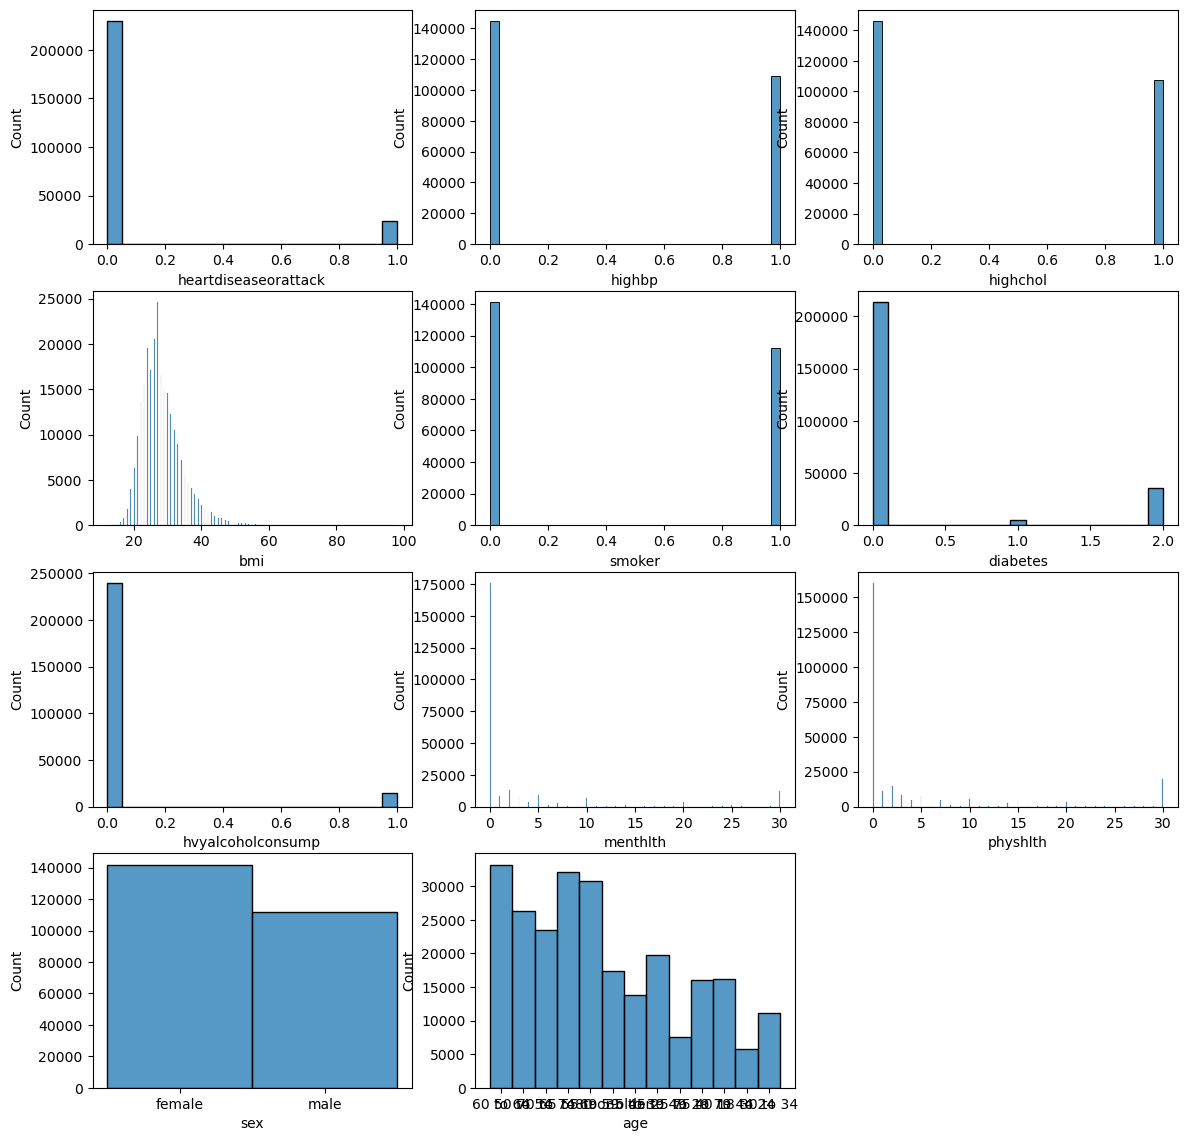

In [4]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(df):
    plt.subplot(4,3,i+1)
  
    sns.histplot(df[col])
    
plt.show()

# Explore


In [5]:
the_list = list(df.columns)
second_list = []
target = the_list.pop(0)
second_list.append(the_list.pop(-1))
second_list.append(the_list.pop(2))
second_list.append(the_list.pop(-3))
second_list.append(the_list.pop(-2))
the_age = second_list.pop(0)

# Which catagorical variable are most related to heart disease or attack
> ## Bivariate Exploration
    > Here ran Chi2 tests on the different catagorical variables towards the target variable
    <br>
    <br>
    > $H_0$: There is no statistical significance between my seleced features and heart disease and attack
    <br>
    <br>
    > $H_\alpha$: There is statistical significance between my seleced features and heart disease and attack
    <br>
    <br>
    $\alpha$: 0.05

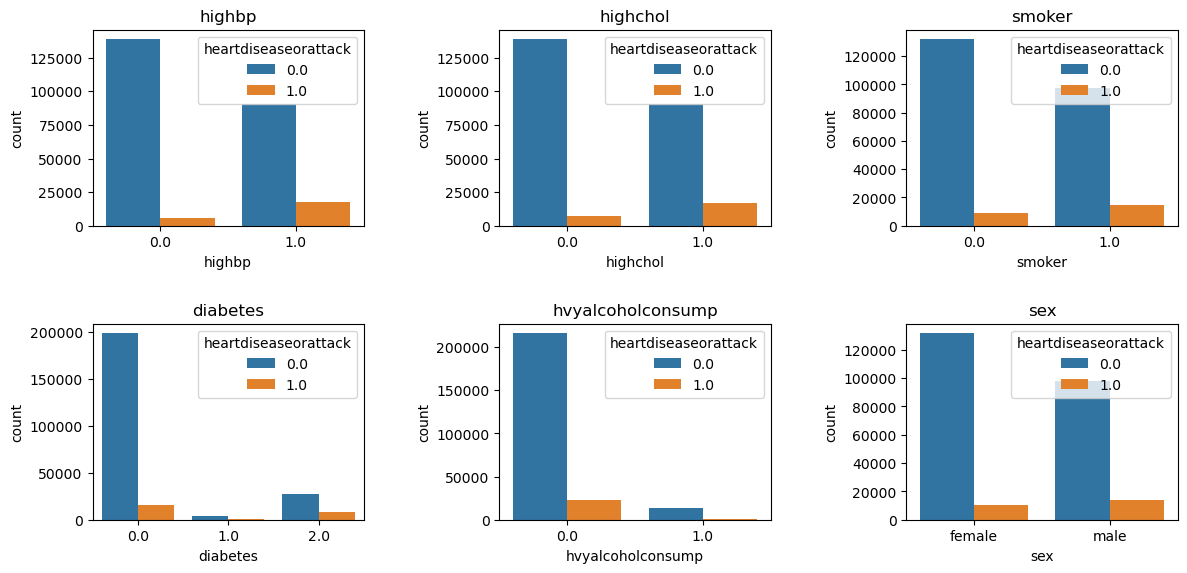

In [6]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(the_list):
    plt.subplot(4,3,i+1)
    sns.countplot(hue=df['heartdiseaseorattack'], x=df[col], data=df).set_title(f'{col}')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Diabetes

In [7]:
df.heartdiseaseorattack[df.diabetes == 0].value_counts()
#213703
# 13%

0.0    198352
1.0     15351
Name: heartdiseaseorattack, dtype: int64

In [8]:
df.heartdiseaseorattack[df.diabetes == 1].value_counts()
#4631
#6.9%

0.0    3967
1.0     664
Name: heartdiseaseorattack, dtype: int64

In [9]:
df.heartdiseaseorattack[df.diabetes == 2].value_counts()
# 35346
# 4.4%

0.0    27468
1.0     7878
Name: heartdiseaseorattack, dtype: int64

# alcohol consumption

In [10]:
df.heartdiseaseorattack[df.hvyalcoholconsump == 0].value_counts()
# 239424
# 10%

0.0    216379
1.0     23045
Name: heartdiseaseorattack, dtype: int64

In [11]:
df.heartdiseaseorattack[df.hvyalcoholconsump == 1].value_counts()
# 14256
# 16.81%

0.0    13408
1.0      848
Name: heartdiseaseorattack, dtype: int64

# sex

In [12]:
df.heartdiseaseorattack[df.sex == 'male'].value_counts()
# 111706
# 8%

0.0    98018
1.0    13688
Name: heartdiseaseorattack, dtype: int64

In [13]:
df.heartdiseaseorattack[df.sex == 'female'].value_counts()
# 141974
# 13%

0.0    131769
1.0     10205
Name: heartdiseaseorattack, dtype: int64

In [14]:
returned_df = wrangle.chi2_test(df, target, the_list)
returned_df

,feature,chi2,p,degf,expected
1,highbp,11117.883141,0.000000e+00,1,"[[131208.12337196467, 98578.87662803532], [136..."
2,highchol,8288.024272,0.000000e+00,1,"[[132329.5216138442, 97457.47838615578], [1375..."
3,smoker,3321.605598,0.000000e+00,1,"[[127952.62637574898, 101834.37362425102], [13..."
4,diabetes,8244.889107,0.000000e+00,2,"[[193575.25725717438, 4194.826541311889, 32016..."
5,hvyalcoholconsump,212.774603,3.408353e-48,1,"[[216873.70974456007, 12913.290255439924], [22..."
6,sex,1879.793182,0.000000e+00,1,"[[128602.09530905077, 101184.90469094923], [13..."


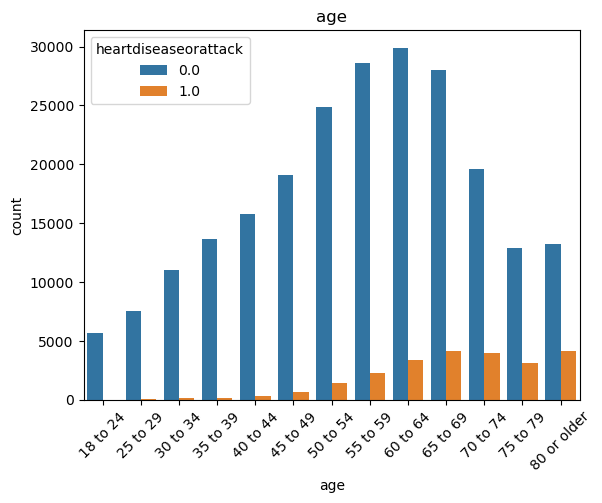

In [15]:
the_order = ['18 to 24', '25 to 29', '30 to 34','35 to 39', '40 to 44',
            '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', 
            '70 to 74', '75 to 79', '80 or older']

sns.countplot(hue=df['heartdiseaseorattack'], x=df['age'], data=df, order = the_order).set_title(f'{the_age}')
plt.xticks(rotation=45)
plt.show()

In [16]:
returned_df = wrangle.chi2_test(df, target, [the_age])
returned_df

,feature,chi2,p,degf,expected
1,age,13731.03958,0.0,12,"[[5163.142147587512, 6882.377901292967, 10075...."


## This confirms that there is a statistical significance between the featured columns and the target variable

> $H_0$: The mean of feature columns  of patients who have had a heart disease or attack equals Mean of feature columns of patients who have not had a heart disease or attack
<br>
<br>
> $H_\alpha$: The mean of feature columns  of patients who have had a heart disease or attack does not equal Mean of feature columns of patients who have not had a heart disease or attack

29.46662202318671
28.26962360794997
4.670321851588331
3.030306327163852
9.154438538484074
3.7312989855823


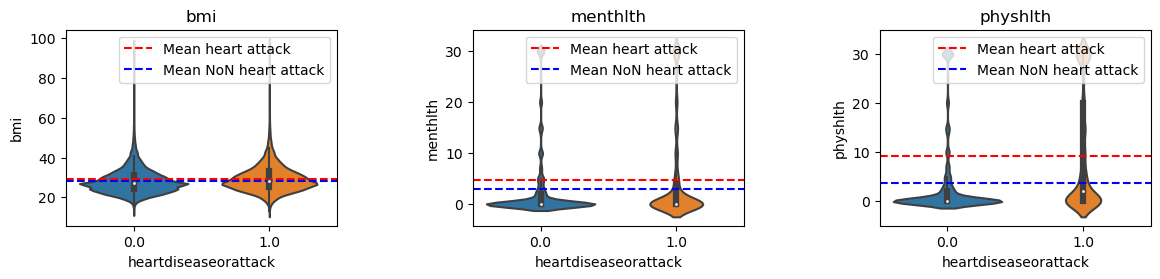

In [17]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(second_list):
    plt.subplot(4,3,i+1)
    sns.violinplot(x=df['heartdiseaseorattack'], y=df[col], data=df).set_title(f'{col}')
    
    mean_value = np.mean(df[col][df['heartdiseaseorattack'] == 1])
    mean_value_2 = np.mean(df[col][df['heartdiseaseorattack'] == 0])
    print(mean_value)
    print(mean_value_2)
    plt.axhline(mean_value, color='red', linestyle='--', label='Mean heart attack')
    plt.axhline(mean_value_2, color='blue', linestyle='--', label='Mean NoN heart attack')
    plt.legend()
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [18]:
for i in second_list:
    t, p = stats.ttest_ind(df[i][df.heartdiseaseorattack == 1.0],df[i][df.heartdiseaseorattack == 0.0])
    print(f'The p value of {i} is {p}')

The p value of bmi is 1.2105348941375393e-156
The p value of menthlth is 7.504190604047673e-233
The p value of physhlth is 0.0


## This confirms that we can reject the null hypothesis on all of the features sent through

In [19]:
def calculate_percentage(value1, value2):
    return (value2 / (value1 + value2) ) * 100

In [20]:
the_list_age_2 = list(df.age.value_counts().index)

for i in the_list_age_2:
    print(df.heartdiseaseorattack[df['age'] == i])

0         0.0
2         0.0
6         0.0
8         1.0
24        0.0
         ... 
253630    1.0
253631    1.0
253635    0.0
253639    0.0
253679    1.0
Name: heartdiseaseorattack, Length: 33244, dtype: float64
5         0.0
11        0.0
16        0.0
26        1.0
47        1.0
         ... 
253606    0.0
253614    0.0
253628    0.0
253653    0.0
253668    1.0
Name: heartdiseaseorattack, Length: 32194, dtype: float64
9         0.0
28        0.0
36        0.0
44        0.0
45        0.0
         ... 
253592    0.0
253602    0.0
253609    0.0
253642    0.0
253671    1.0
Name: heartdiseaseorattack, Length: 30832, dtype: float64
1         0.0
12        0.0
17        0.0
42        0.0
46        0.0
         ... 
253636    0.0
253644    0.0
253657    0.0
253660    0.0
253678    0.0
Name: heartdiseaseorattack, Length: 26314, dtype: float64
3         0.0
4         0.0
7         0.0
13        0.0
33        0.0
         ... 
253604    0.0
253612    0.0
253652    0.0
253667    0.0
253676    0.

In [21]:
the_order = ['18 to 24', '25 to 29', '30 to 34','35 to 39', '40 to 44',
            '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', 
            '70 to 74', '75 to 79', '80 or older']
the_list_age_2 = the_order

df.heartdiseaseorattack[df['age'] == the_list_age_2[0]].value_counts()
the_age_df = pd.DataFrame()                    
    
for i in the_list_age_2:
    value = calculate_percentage(df.heartdiseaseorattack[df['age'] == i].value_counts()[0]
                         , df.heartdiseaseorattack[df['age'] == i].value_counts()[1])

    the_age_df_2 = pd.DataFrame({str(i):[float(value)]})
    the_age_df = the_age_df.append(the_age_df_2)

    
the_age_df

,18 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80 or older
0,0.508772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,0.710713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1.132788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.396224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,2.172433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,3.592512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,5.415368,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.307343,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.101071,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.024166,NaN,NaN,NaN


In [22]:
df.heartdiseaseorattack[df['age'] == '18 to 24'].value_counts()[1] / (df.heartdiseaseorattack[df['age'] == '18 to 24'].value_counts()[0] + df.heartdiseaseorattack[df['age'] == '18 to 24'].value_counts()[1]) 


0.005087719298245614

# Exploration Summary
> - All of the features were statistically significant towards heard disease or attack

> - More people with high blood pressure had heart disease or a heart attack than those that did not
> - More people with high cholestreol had heart disease or a heart attack than those that did not
> - More people that smoked had heart disease or a heart attack than those that did not
> - People without diabeties had heart attacks 8.6% more than those that did have diabetes
> - You are 5% more likely to have a heart attack if you are a female
> - People who consumed heavy amounts of alcohol had heart disease or heart attacks 6.81% more than those that did not consume heavy amounts of alcohol

> - People in higher age brackets have a higher percentage of people who have had a heart disease or attack
> - People who have had heart attacks had more days of bad physical health
> - People who have had heart attacks had more days of bad mental health
> - People who have had heart attack and people who didn't have heart attacks have a similar bmi mean

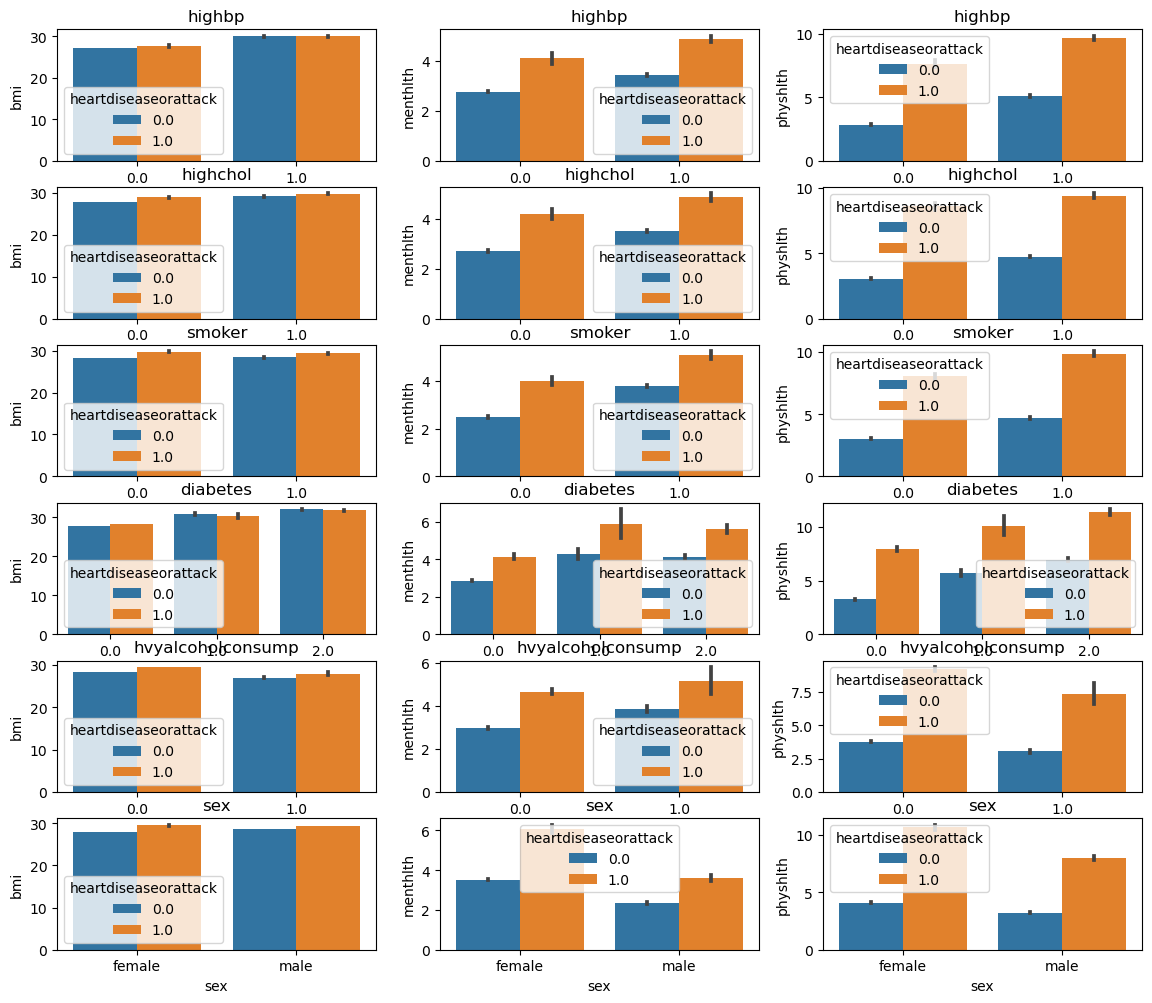

In [23]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
i = 0

the_list # catagorical
second_list # continuous

for col in the_list:
    for second in second_list: 
        plt.subplot(7,3,i+1)
        sns.barplot(data=df, x=col, y=second, hue=df.heartdiseaseorattack).set_title(f'{col}')
        i +=1
    
plt.show()

In [24]:
train, validate, test = wrangle.split_data(df, 'heartdiseaseorattack')

In [25]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test, cols = second_list)

In [26]:
list(df.iloc[:, :1].columns)

['heartdiseaseorattack']

In [27]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.mvp_info(train_scaled, validate_scaled, test_scaled,list(df.iloc[:, 1:].columns), list(df.iloc[:, :1].columns))

In [28]:
# getting baseline
df.heartdiseaseorattack.value_counts()
# 253680

# 90%

0.0    229787
1.0     23893
Name: heartdiseaseorattack, dtype: int64

In [29]:
list(X_train.iloc[:, -2:])

['sex', 'age']

In [30]:

X_train, X_validate, X_test = wrangle.get_dummies(X_train, X_validate, X_test,the_columns= list(X_train.iloc[:, -2:]))

In [31]:
X_train

,highbp,highchol,bmi,smoker,diabetes,hvyalcoholconsump,menthlth,physhlth,sex_female,sex_male,...,age_35 to 39,age_40 to 44,age_45 to 49,age_50 to 54,age_55 to 59,age_60 to 64,age_65 to 69,age_70 to 74,age_75 to 79,age_80 or older
78191,1.0,0.0,0.209302,1.0,0.0,0.0,0.000000,0.033333,0,1,...,0,1,0,0,0,0,0,0,0,0
122594,0.0,0.0,0.174419,0.0,0.0,0.0,0.000000,0.000000,0,1,...,1,0,0,0,0,0,0,0,0,0
129920,1.0,0.0,0.081395,1.0,0.0,0.0,0.066667,0.066667,0,1,...,0,0,0,0,0,0,0,0,0,1
36266,0.0,0.0,0.162791,1.0,0.0,0.0,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
97592,1.0,0.0,0.174419,0.0,1.0,0.0,0.000000,0.000000,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19146,1.0,0.0,0.337209,0.0,0.0,0.0,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
224147,0.0,0.0,0.197674,0.0,0.0,0.0,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
35375,0.0,0.0,0.186047,1.0,0.0,0.0,0.000000,0.000000,0,1,...,0,1,0,0,0,0,0,0,0,0
188273,0.0,1.0,0.104651,0.0,0.0,0.0,0.000000,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
the_df = wrangle.create_knn(X_train,y_train, X_validate, y_validate)

In [36]:
the_df['difference'] = abs(the_df.train_predict - the_df.validate_predict)

In [41]:
the_df = the_df.sort_values(by = 'difference')
the_df

,model_train,train_predict,validate_predict,n_neighbors,difference
0,knn,0.905814,0.905814,neighbors,0.000000
20,KNeighborsClassifier,0.907548,0.904920,20,0.002628
18,KNeighborsClassifier,0.907640,0.904585,18,0.003055
19,KNeighborsClassifier,0.907462,0.903954,19,0.003508
16,KNeighborsClassifier,0.907653,0.904092,16,0.003561
17,KNeighborsClassifier,0.907534,0.903737,17,0.003797
14,KNeighborsClassifier,0.907975,0.904151,14,0.003824
15,KNeighborsClassifier,0.908099,0.903599,15,0.004500
12,KNeighborsClassifier,0.908336,0.903816,12,0.004520
10,KNeighborsClassifier,0.908973,0.903343,10,0.005630


In [43]:
the_df.to_csv('KNN.csv')

In [45]:
Logistic_regression_df = wrangle.create_logistic_regression(X_train,y_train, X_validate, y_validate)

In [49]:
Logistic_regression_df['difference'] = abs(Logistic_regression_df.train_predict - Logistic_regression_df.validate_predict)
Logistic_regression_df = Logistic_regression_df.sort_values(by = 'difference')
Logistic_regression_df
Logistic_regression_df.to_csv('LR.csv')

In [50]:
RF_df, test_df = wrangle.create_random_forest(X_train,y_train, X_validate, y_validate,X_test, y_test)

In [51]:
RF_df['difference'] = abs(RF_df.train_predict - RF_df.validate_predict)
RF_df = RF_df.sort_values(by = 'difference')

RF_df

,model_train,train_predict,validate_predict,max_depth,difference
0,RandomForestClassifier,0.905814,0.905814,max_depth,0.000000
8,RandomForestClassifier,0.905826,0.905826,8,0.000000
1,RandomForestClassifier,0.905813,0.905826,1,0.000013
2,RandomForestClassifier,0.905813,0.905826,2,0.000013
3,RandomForestClassifier,0.905813,0.905826,3,0.000013
4,RandomForestClassifier,0.905813,0.905826,4,0.000013
5,RandomForestClassifier,0.905813,0.905826,5,0.000013
6,RandomForestClassifier,0.905813,0.905826,6,0.000013
7,RandomForestClassifier,0.905813,0.905826,7,0.000013
9,RandomForestClassifier,0.905977,0.905925,9,0.000053


In [54]:
RF_df.to_csv('RF.csv')

In [52]:
DT_df = wrangle.create_descision_tree(X_train,y_train, X_validate, y_validate)

In [53]:
DT_df['difference'] = abs(DT_df.train_predict - DT_df.validate_predict)
DT_df = DT_df.sort_values(by = 'difference')
DT_df

,model_train,train_predict,validate_predict,max_depth,difference
0,DecisionTreeClassifier,0.640261,0.640261,max_depth,0.000000
1,DecisionTreeClassifier,0.905813,0.905826,1,0.000013
2,DecisionTreeClassifier,0.905813,0.905826,2,0.000013
3,DecisionTreeClassifier,0.905813,0.905826,3,0.000013
4,DecisionTreeClassifier,0.905813,0.905826,4,0.000013
5,DecisionTreeClassifier,0.905813,0.905826,5,0.000013
6,DecisionTreeClassifier,0.905872,0.905767,6,0.000105
7,DecisionTreeClassifier,0.906076,0.905176,7,0.000900
8,DecisionTreeClassifier,0.906529,0.905136,8,0.001393
9,DecisionTreeClassifier,0.907390,0.903993,9,0.003397


In [56]:
DT_df.to_csv('DT.csv')

# Modeling Summary
> * Established baseline to beat at: 90.58%
> * Ran through four different classification models.
> * Random Forest at max_depth=16 performed the best with an accuracy score of 92%.
> * Ran final model on test data set. Result: 90.6%

# Conclusion
> * My top model performed beat baseline by .02 %

# Recommendations
> * I would not recommend using the model because it did not beat baseline by a significant result

# Next Steps
> * Create new columns out of existing columns to use during the modeling phase
> * Send in different combinations of columns into the different models
> * Gather more data to make the models even more accurate

In [58]:
test_df.to_csv('testRF.csv')

In [59]:
test_df

,model_train,baseline,max_depth
0,RandomForestClassifier,0.905814,max_depth
1,RandomForestClassifier,0.906000,4
